In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:

"""

watch: 🎬 Lecture: Feature Selection and Engineering (Flex)


recom and concl are consistent with business problem. You can decide business problem at the 
end

baseline model with strongest correlated with salesprice(single lin regression)
-pearson correlation(heatmap), pairplots, 

2nd feature that correlation with price but not correlated with highest correlated

3rd feature with all values(use categorical values)

conclusion and final model and results(may be very redundant)

recommendations

limitations 

next steps
"""

We begin by loading and then previewing our data

In [2]:
url = 'https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v2-5/main/data/kc_house_data.csv'
df = pd.read_csv(url)
re = df.copy()
re.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Let's take a look at the data type of each row, and to see if there are any missing values

In [3]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

We see that there are 2 columns with missing values let's just drop the rows with missing values. 

In [4]:
re = re.dropna()

Now lets take a further look into the statistics within each numerical row

In [5]:
re.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


We see the df is houses built between 1900-2022, that were sold in 2021 or 2022.

It look's like all the houses are in the USA but let's just create a new column with the last 14 digits in the `address` column to confirm

In [6]:
re['address'].str[-14:].value_counts()

 United States    30111
Name: address, dtype: int64

As we assumed, all the data is from the USA.

## Data Analysis

We will begin our data analysis by finding the variable that correlate the highest with out target variable, `price`.

First, let's pull up a correlation matrix of all the data.

In [7]:
re.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034096,-0.007065,-0.012382,-0.028234,-0.119276,0.031941,-0.023340,-0.015077,-0.008044,-0.041644,0.023076,-0.028858,-0.000764,0.000638
price,-0.034096,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.538631,0.245005,0.263674,0.313789,0.095796,0.085023,0.063430,-0.022278
bedrooms,-0.007065,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,0.145497,0.015369,0.108883,-0.106791
bathrooms,-0.012382,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,0.443379,0.041574,-0.005481,0.017684
sqft_living,-0.028234,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,0.291242,0.039089,0.102205,-0.087625
sqft_lot,-0.119276,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,0.001897,0.009390,0.030041,-0.034408
floors,0.031941,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,0.544314,-0.025041,-0.218174,0.233589
sqft_above,-0.023340,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,0.387253,0.011036,0.092317,-0.082722
sqft_basement,-0.015077,0.245005,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,-0.230783,0.054032,0.059664,-0.045104
sqft_garage,-0.008044,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,0.447720,-0.098301,0.092092,-0.096639


Now lets create a heatmap to see if we can get a better view

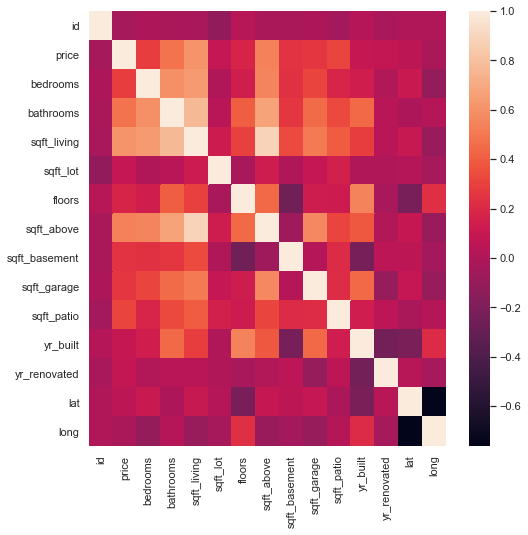

In [8]:
sns.set(rc={'figure.figsize':(8,8)})

sns.heatmap(re.corr());

There is still too much going on in both of those, so let's pull up the correlations within the price column alone.

In [9]:
re_corrs = re.corr()['price'].sort_values(ascending=False)
re_corrs

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

Unsurprisingly price is 100% correlated with itself. The variable with the strongest correlation with price is `sqft_living` with a value of .61. This column describes the total square footage of living space in the home. It is quite logical that this is the highest correlated factor, as in general the bigger the house is, the more it will sell for. 

### Single Variable Regression Model

Lets create a basic regression model with the highest correlated value. We should keep in mind that this could also be a negative number(although in this case it clearly isn't). With a correlation value of .61 we shouldn't expect such a great model, as although this doesn't illustrate some significance, it is nowhere near perfect

First we will pull up a scatter plot showing the relationship between `sqft_living` and `price`. In plotting scatterplot, I encountered an error and with some interet research I found an import statement that can be used as a workaround. To see more about the issue <a href="https://stackoverflow.com/questions/55109716/c-argument-looks-like-a-single-numeric-rgb-or-rgba-sequence">click here</a>




In [10]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

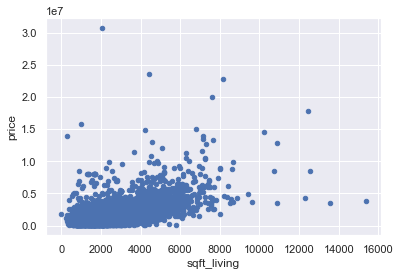

In [11]:
re.plot.scatter(x='sqft_living', y="price", figsize=(6,4));

There seems to be some sort of upward trend with a few outlier values, both on the x and y axes.

Now, let's move on to plot the actual model. We will first set `price` as our target value, and then `sqft_living` as our X value for our first model. Then we will use methods from statsmodels to create the model. Finally we will pull up the summary stats.

In [12]:
y = re['price']
X_baseline = re['sqft_living']

In [13]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:01:13   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

Now we will calculate the baseline mean absolute error, and then we will give an analysis of our model.

In [14]:
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
print(f'Baseline Mae: {round(baseline_mae,2)}')

Baseline Mae: 396271.45


`sqft_living` was the attribute most strongly correlated with price, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 37% of the variance in price. Although there is some significance to this number, there definitely is room to improve.
In a typical prediction, the model is off by around $396k. 

- The intercept is at about -\\$76k. This means that a house with 0 square feet of living area  would sell for -\$76k. It is fine that this value doesn't make sense as there is no such thing as a house that is 0 square feet. 
- The coefficient for sqft_living is about \\$560. This means for each additional square foot of living area, the house price increase by $560.

### Adding Other Factors
In hopes of creating a better model we will add in other numerical factors. However, we want to make to sure to avoid multicollinearity, meaning that one factor shouldn't be a good predictor of a different factor. To avoid this we will pull up the correlation between all numerical factors with eachother. The ones with correlation above .7 we won't use.

In [15]:
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

hi_corr = re.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
hi_corr['pairs'] = list(zip(hi_corr.level_0, hi_corr.level_1))

# set index to pairs
hi_corr.set_index(['pairs'], inplace = True)

#drop level columns
hi_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
hi_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
hi_corr.drop_duplicates(inplace=True)
hi_corr[(hi_corr.cc>.7) & (hi_corr.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.883733
"(bathrooms, sqft_living)",0.772226
"(lat, long)",0.760532


It seems that we should either use long or lat if we plan on using any of them, and probably better to only use one of: sqft_above, sqft_living, bathrooms, as there is high multicollinearity between these values. Since sqft_living is the highest correlated with price we will stick with that. 

So let's reload the correlation values, and create a new model with the values that aren't highly correlated with eachother.

In [16]:
re_corrs

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

Our new X value is all of the numerical factors, except for `sqft_above`, `bathrooms`, `sqft_lot`, `long`, `lat`, and `id`. 

In [17]:
X_2 = re[['sqft_living', 'sqft_patio', 'bedrooms', 'sqft_garage', 'sqft_basement','floors', 
          'yr_built', 'yr_renovated']]

In [18]:
model2 = sm.OLS(y, sm.add_constant(X_2))
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     2539.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:01:15   Log-Likelihood:            -4.4767e+05
No. Observations:               30111   AIC:                         8.954e+05
Df Residuals:                   30102   BIC:                         8.954e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.577e+06   3.37e+05     16.564

In [19]:
results2_mae = mean_absolute_error(y, results2.predict(sm.add_constant(X_2)))
print(f'Model 2 Mae: {round(results2_mae,2)}')

Model 2 Mae: 381971.71


Our new model is describing the relationship between most of the numerical factors and price.

Overall the model is still statistically significant and is slightly better than the last as it explains 40.3% of the variance in price. This number still isn't great, and could use some improvement. 

All of the individual parts of the model are still statistically significant.

- The model is off by slightly less then the last one, as the MAE is now \\$381K. 
- The constant has had a drastic change and is now roughly \\$5.6 million. Again, it is fine that this number doesn't make sense, as there is no such thing as a house with 0 sqft.
- The coefficient:
    - `sqft_living`:     644.1443.
    - `sqft_patio`:      264.3368   
    - `bedrooms`:      -1.477e+05   
    - `sqft_garage`:     -52.7882   
    - `sqft_basement`:    28.4341    
    - `floors`:         7.007e+04   
    - `yr_built`:      -2780.7161    
    - `yr_renovated`:     66.2543

The values for all the factors except for `bedrooms`, `sqft_garage`, and `yr_built` are all quite reasonable, in that they are positive. Meaning, that usually when you have more square feet in a certain area, more floors, or a newly renovated house the price goes up. However, in general adding extra bedrooms, a larger garage, or a newer house causes the price to go up although this model seems to indicate the opposite. This is a clear sign that the model can use some improvement.

Let's create a row that gives us the age of the house when it was sold to see if this is a better predictor then `yr_built`

In [20]:
re['year_sold'] = pd.DatetimeIndex(re['date']).year
re['age'] = re['year_sold'] - re['yr_built']

When we tweak our model to compate `age` and `yr_built` we see that the adjusted r-squared values are the same. As such we will stick with our original model which includes `yr_built`

If we play around with the data a bit, we can create a column that gives the amount of floors per lot size that may have a slightly positive impact on our model, that we can use later on

In [21]:
re['floors_per_lotsize'] = re['floors']/re['sqft_lot']

## Adding Categorical Factors

Let's move on and add in categorical factors to our model

We'll begin by creating a list of all the categorical factors

In [22]:
catCols = [col for col in re.columns if re[col].dtype=="O"]
catCols

['date',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'address']

It is probably fair to assume that address doesn't have much of an affect on the price, and we already used date so lets check out other variables.

Let's begin by pulling up histograms of all the categorical factors to see which ones seem to have a strong variance in price based on each value. When loading the histograms, I got a 'SettingWithCopyWarning', as a quick fix I googled an import code to remove this warning. To see more about the issue <a href="https://www.dataquest.io/blog/settingwithcopywarning/">click here</a>

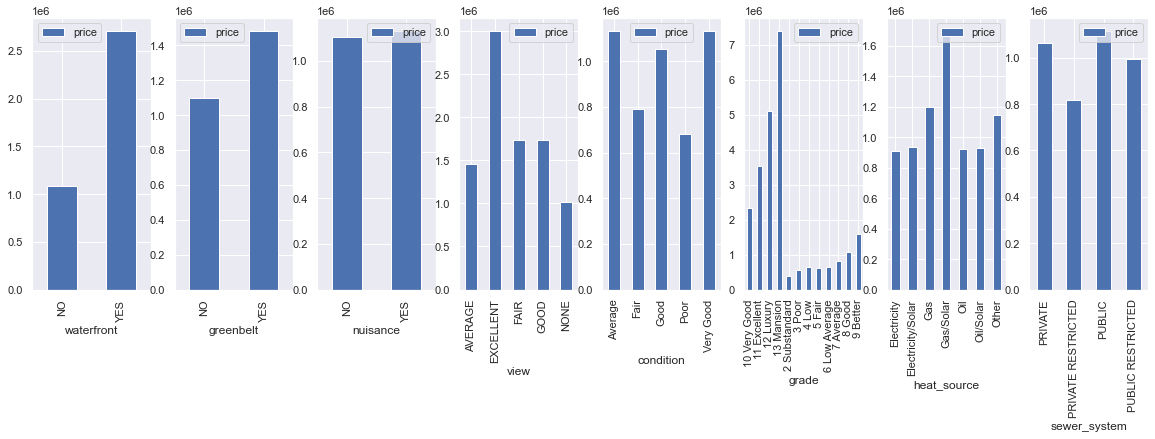

In [23]:
pd.options.mode.chained_assignment = None

categorical_features = re.select_dtypes("object").columns
categorical_re = re.select_dtypes(include=['object'])
categorical_re.drop(columns=['date', 'address'], inplace = True)
categorical_features = np.array(categorical_re.columns)
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(20,5))

for index, feature in enumerate(categorical_features):
    re.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

Upon examining the graphs we find some useful information:

- Everything seems to have atleast a slight variance across each of it's individual values.
- Looking at the y-axis, `grade` seems to be the most significant, followed by `view` and `waterfront`. 

So lets start with grade, and one hot encode new dummy values

In [24]:
iterated_X1 = re[['sqft_living', 'sqft_patio', 'bedrooms', 'sqft_garage','sqft_basement',
                  'floors', 'yr_built', 'yr_renovated', 'grade']]
iterated_X1 = pd.get_dummies(iterated_X1, columns=['grade']) 
iterated_X1.head()

,sqft_living,sqft_patio,bedrooms,sqft_garage,sqft_basement,floors,yr_built,yr_renovated,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180,40,4,0,0,1.0,1969,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2770,240,5,0,1570,1.0,1950,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2880,0,6,0,1580,1.0,1956,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2160,270,3,200,1070,2.0,2010,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1120,30,2,550,550,2.0,2012,0,0,0,0,0,0,0,0,0,0,1,0,0


Since `grade_2Substandard` is the worst level, we will drop it, and use it as the baseline

In [25]:
iterated_X1.drop('grade_2 Substandard', axis=1, inplace=True)
iterated_X1.head()

,sqft_living,sqft_patio,bedrooms,sqft_garage,sqft_basement,floors,yr_built,yr_renovated,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180,40,4,0,0,1.0,1969,0,0,0,0,0,0,0,0,0,1,0,0
1,2770,240,5,0,1570,1.0,1950,0,0,0,0,0,0,0,0,0,1,0,0
2,2880,0,6,0,1580,1.0,1956,0,0,0,0,0,0,0,0,0,1,0,0
3,2160,270,3,200,1070,2.0,2010,0,0,0,0,0,0,0,0,0,0,0,1
4,1120,30,2,550,550,2.0,2012,0,0,0,0,0,0,0,0,0,1,0,0


Now, we create our first model with categorical values

In [26]:
iterated_model1 = sm.OLS(y, sm.add_constant(iterated_X1))
iterated_results1 = iterated_model1.fit()
print(iterated_results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     1503.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:01:20   Log-Likelihood:            -4.4539e+05
No. Observations:               30111   AIC:                         8.908e+05
Df Residuals:                   30091   BIC:                         8.910e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.489e+06   7

Our model as a whole is statistically significant, and the adjusted r squared has increased from 40.3% to 48.7%

However, all the coefficients for `grade` that are below 11 are not statistically significant.

So let's try engineering a new feature that is only the higher level grades. We will create a new row called `high_grade` that will say "yes" if the grade is 11 or up, and "no" if the grade is below 11. We will then create new dummy values and run a new model with our new column instead of `grade`

In [27]:
re['high_grade'] = re['grade'].apply(lambda x: 'yes' if 
                                     x.__contains__('11') or
                                     x.__contains__('12') or
                                     x.__contains__('13')
                                     else 'no')

In [28]:
iterated_X2 = re[['sqft_living', 'sqft_patio', 'bedrooms', 'sqft_garage','sqft_basement',
                  'floors', 'yr_built', 'yr_renovated', 'high_grade']]
iterated_X2 = pd.get_dummies(iterated_X2, columns=['high_grade'], drop_first=True) 
iterated_X2.head()

,sqft_living,sqft_patio,bedrooms,sqft_garage,sqft_basement,floors,yr_built,yr_renovated,high_grade_yes
0,1180,40,4,0,0,1.0,1969,0,0
1,2770,240,5,0,1570,1.0,1950,0,0
2,2880,0,6,0,1580,1.0,1956,0,0
3,2160,270,3,200,1070,2.0,2010,0,0
4,1120,30,2,550,550,2.0,2012,0,0


In [29]:
iterated_model2 = sm.OLS(y, sm.add_constant(iterated_X2))
iterated_results2 = iterated_model2.fit()
print(f'r^2 Adj: {iterated_results2.rsquared_adj}')
print(f'p values:\n {iterated_results2.pvalues}')

r^2 Adj: 0.4412061147471078
p values:
 const             4.234582e-48
sqft_living       0.000000e+00
sqft_patio        2.807085e-42
bedrooms          1.037692e-87
sqft_garage       3.505635e-06
sqft_basement     6.806510e-08
floors            2.683107e-20
yr_built          1.683872e-43
yr_renovated      6.127883e-16
high_grade_yes    0.000000e+00
dtype: float64


Although, this model has a slightly lower adjusted r squared then the previous model, at only 44.1%, it is still much better then our original model. Additionally, all the variables are now statistically significant. 

Lets pull up the value counts to see if there is a significant number of higher grade houses.

In [30]:
re.high_grade.value_counts()

no     29559
yes      552
Name: high_grade, dtype: int64

We see that since there is such a small amount of high graded houses, `grade` only becomes a significant factor for houses with grades 11-13.

Let's add in view now, to see how it affects our model

In [31]:
iterated_X3 = re[['sqft_living', 'sqft_patio', 'bedrooms', 'sqft_garage','sqft_basement',
                  'floors', 'yr_built', 'yr_renovated', 'high_grade', 'view']]
iterated_X3 = pd.get_dummies(iterated_X3, columns=['high_grade', 'view']) 
iterated_X3.drop(['view_NONE','high_grade_no'], axis=1, inplace=True)

In [32]:
iterated_model3 = sm.OLS(y, sm.add_constant(iterated_X3))
iterated_results3 = iterated_model3.fit()
print(f'R^2 Adj: {iterated_results3.rsquared_adj}')
print(f'P values:\n {iterated_results3.pvalues}')

R^2 Adj: 0.46779088773981725
P values:
 const             1.795149e-39
sqft_living       0.000000e+00
sqft_patio        1.144995e-20
bedrooms          1.611296e-59
sqft_garage       1.837180e-03
sqft_basement     3.149082e-02
floors            1.159374e-21
yr_built          1.088882e-35
yr_renovated      1.339835e-08
high_grade_yes    0.000000e+00
view_AVERAGE      2.472675e-11
view_EXCELLENT    0.000000e+00
view_FAIR         1.656540e-13
view_GOOD         2.396306e-10
dtype: float64


Now that is a significantly better adjusted r-squared and all of our values our significant.

However, lets check out the value counts to see if there is a significant amount of data.

In [33]:
re.view.value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [34]:
print(f'Percentage with no view: {round(26555/30111*100,2)}')

Percentage with no view: 88.19


Since roughly 90% of the data has no view this factor only becomes significant when a house has a view.

Instead of going through each categories value counts one by one, lets just pull them up now, to see which one has a fair distribution of values

In [35]:
categoricals = re.select_dtypes("object")
categoricals.drop(['date', 'address', 'grade','view','high_grade'], axis=1, inplace=True)
for col in categoricals:
    print(re[col].value_counts(), "\n")

NO     29600
YES      511
Name: waterfront, dtype: int64 

NO     29339
YES      772
Name: greenbelt, dtype: int64 

NO     24862
YES     5249
Name: nuisance, dtype: int64 

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64 

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64 

PUBLIC                25767
PRIVATE                4336
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64 



In [36]:
categorical_col = list(categoricals.columns.values)
categorical_col

['waterfront',
 'greenbelt',
 'nuisance',
 'condition',
 'heat_source',
 'sewer_system']

In [37]:
iterated_X4 = re[['sqft_living', 'sqft_patio', 'bedrooms',
                  'floors', 'yr_built', 'yr_renovated', 'high_grade', 'view', 'waterfront',
                  'nuisance', 'condition','sewer_system']]
iterated_X4 = pd.get_dummies(iterated_X4, columns=['high_grade', 'view', 'waterfront',
                                                   'nuisance', 'condition','sewer_system']) 
iterated_X4.drop(['view_NONE','high_grade_no', 'waterfront_NO', 'nuisance_NO' ,
                  'condition_Poor', 'sewer_system_PRIVATE'], axis=1, inplace=True)
iterated_model4 = sm.OLS(y, sm.add_constant(iterated_X4))
iterated_results4 = iterated_model4.fit()
print(f'R^2 Adj: {iterated_results4.rsquared_adj}')
print(f'P values:\n {iterated_results4.pvalues}')

R^2 Adj: 0.4821301296199909
P values:
 const                               2.792621e-31
sqft_living                         0.000000e+00
sqft_patio                          2.272259e-31
bedrooms                            8.457273e-70
floors                              3.263123e-12
yr_built                            7.082854e-35
yr_renovated                        9.360324e-08
high_grade_yes                      0.000000e+00
view_AVERAGE                        4.805505e-06
view_EXCELLENT                     1.656982e-114
view_FAIR                           1.975433e-11
view_GOOD                           3.974847e-05
waterfront_YES                      6.261597e-98
nuisance_YES                        6.528996e-12
condition_Average                   1.364019e-01
condition_Fair                      6.797705e-01
condition_Good                      9.776616e-02
condition_Very Good                 1.874762e-02
sewer_system_PRIVATE RESTRICTED     1.884776e-01
sewer_system_PUBLIC           

With some tinkering with the categorical columns we get this model. The model now has an adjusted r&sup2; of 48.2%. However, some of the p values for the predictors are no longer significant. lets see if we can break down some of these columns into larger groups to get significant p values for every predictor. We can also take out `sqft_garage` and `sqft_basement` as they didn't have any affect on the model.

Let's break the `sewer_system` column down into 2 values, that say whether it's public or private. Additionally let's break down the `condition` column into 2 values, whether it is atleast in "good" condition.

In [38]:
re['sewer_system_public'] = re['sewer_system'].apply(lambda x: 'yes' if 
                                     x.__contains__('PUBLIC')
                                     else 'no')
re['good_condition'] = re['condition'].apply(lambda x: 'yes' if 
                                     x.__contains__('Good')
                                     else 'no')
print(re.sewer_system_public.value_counts())
print(re.good_condition.value_counts())

yes    25770
no      4341
Name: sewer_system_public, dtype: int64
no     18801
yes    11310
Name: good_condition, dtype: int64


Now we will create and run our new model

In [48]:
iterated_X5 = re[['sqft_living', 'sqft_patio', 'bedrooms', 'yr_built', 'yr_renovated',
                  'high_grade', 'view', 'waterfront', 'nuisance', 'good_condition',
                  'sewer_system_public']]
iterated_X5 = pd.get_dummies(iterated_X5, columns=['high_grade', 'view', 'waterfront',
                                                   'nuisance', 'good_condition',
                                                   'sewer_system_public']) 
iterated_X5.drop(['view_NONE','high_grade_no', 'waterfront_NO', 'nuisance_NO',
                  'good_condition_no', 'sewer_system_public_no'], axis=1, inplace=True)
iterated_model5 = sm.OLS(y, sm.add_constant(iterated_X5))
iterated_results5 = iterated_model5.fit()
print(f'R^2 Adj: {iterated_results5.rsquared_adj}')
print(f'P values:\n {iterated_results5.pvalues}')

R^2 Adj: 0.48092902124601145
P values:
 const                       2.092652e-25
sqft_living                 0.000000e+00
sqft_patio                  1.586113e-32
bedrooms                    6.073260e-72
yr_built                    1.695862e-25
yr_renovated                3.056889e-09
high_grade_yes              0.000000e+00
view_AVERAGE                7.774605e-06
view_EXCELLENT             6.606898e-113
view_FAIR                   3.840854e-11
view_GOOD                   4.653519e-05
waterfront_YES              4.614670e-98
nuisance_YES                4.031773e-13
good_condition_yes          3.393990e-03
sewer_system_public_yes    1.486535e-108
dtype: float64


Now we have our highest adjusted r&sup2; is it's highest yet at 48.2% and all the p values for coefficients are significant

Using some basic googling and common knowledge it seems like one of the main factors in price is location. As such let's create a new column that isolates the zipcode. We will do use by using the str method on the address column.

In [40]:
re['zipcode'] = re['address'].str[-20:-15]
re.zipcode.head()

0    98055
1    98133
2    98178
3    98118
4    98027
Name: zipcode, dtype: object

In [47]:
iterated_X6 = re[['sqft_living', 'sqft_patio', 'bedrooms', 
                  'yr_built', 'yr_renovated','high_grade', 'view', 'waterfront', 'nuisance', 
                  'good_condition','sewer_system_public', 'zipcode']]
iterated_X6 = pd.get_dummies(iterated_X6, columns=['high_grade', 'view', 'waterfront',
                                                   'nuisance', 'good_condition',
                                                   'sewer_system_public', 'zipcode']) 
iterated_X6.drop(['view_NONE','high_grade_no', 'waterfront_NO', 'nuisance_NO',
                  'good_condition_no', 'sewer_system_public_no', 'zipcode_99504'], 
                 axis=1, inplace=True)
iterated_model6 = sm.OLS(y, sm.add_constant(iterated_X6))
iterated_results6 = iterated_model6.fit()
print(iterated_results6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     139.1
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:07:42   Log-Likelihood:            -4.3925e+05
No. Observations:               30111   AIC:                         8.793e+05
Df Residuals:                   29698   BIC:                         8.828e+05
Df Model:                         412                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [42]:
iterated_results5_mae = mean_absolute_error(y, iterated_results5.predict(sm.add_constant(iterated_X5)))
print(f'Iterated Model 5 Mae: {round(iterated_results5_mae,2)}')

Iterated Model 5 Mae: 256787.05


Aside from some scaling, centering, or other minor changes, this will be our final model.
Our final model is describing the relationship between many factors numeric and categorical factors of a house, and price.

Overall the model is statistically significant as it explains 65.4% of the variance in price. This number is quite an improvement over our old models.

All of the individual parts of the model are still statistically significant except for 1 zipcode.

The model is off by much less than the previous ones, as the MAE is now only \\$257K.  

The constant has had a drastic change and is now roughly $3 million. Again, it is fine that this number doesn't make sense, as there is no such thing as a house with 0 sqft.

The coefficients:
- sqft_living               394.8094
    - This value means that for an increase in 1 square foot of living area, price increases by \\$395.
- sqft_patio                 85.6320
    - This value means that for an increase in 1 square foot of patio area, price increases by \\$86.
- bedrooms                -4.617e+04
    - This means that for every bedroom in a house there is a decrease in price of around \\$46k. As we mentioned earlier this value is quite strange, as bedrooms has a positive relationship with price. It seems as though taking all the factors in the model into account this is what comes out. 
- yr_built                  436.9200
    - This means that for every increase in year the price goes up by \\$436. In other words the newer the house is the more it will cost.
- yr_renovated               46.3294
    - Similar to the year the house was built, the newer the renovation done on the houes the more it will cost.
- high_grade_yes           1.067e+06
    - This category is indicating whether the house has a grade of 11 or above. Grades 11-13 indicate whether it's "Excellent", "Luxury", or "Mansion". If it is in one of these categories the price will go up by over \\$1 million dollars.
- view_AVERAGE             8.003e+04
- view_EXCELLENT           8.135e+05
- view_FAIR                1.913e+05
- view_GOOD                 1.53e+05
    - These next 4 are describing the relationship that the houses view has on its price. They are all being compared to houses with no view at all. If the house does have a view from "Average" to "Excellent", this price will go up by \\$80k-\\$813k on average.
- waterfront_YES           7.651e+05
    - Whether the house is on a waterfront will also have a major impact on it's price, and on average will cause a price increase of \\$765k.
- nuisance_YES            -3.967e+04
    - Whether the house has traffic noise or other recorded nuisances will cause the price of the house to drop by \\$40k on average. 
- good_condition_yes       5.201e+04
   - Whether the overall condition of the house it good or better, in terms of its maintenance will cause the house price to increase by \\$52k on average.
- sewer_system_public_yes  2.419e+04  
    - Whether the house uses a public sewer system in comparison to a private one will increase it's value on average by \\$24k. 

Most of the coefficients is this model are quiet logical, that they are positive vs negative. The only major standout is bedrooms, in that more bedrooms is generally viewed as having a positive impact on the houses price. The combination of this coefficient, a MAE of \\$257, and an adjusted r&sup2; not quite close enough to 1, indicates there is still room for improvement of the model. Perhaps given other data about the neighborhood of the houses, proximity to houses of worship, details whether the house is more kid friendly, etc. could allow us to create a more accurate model. 

## Final Model results

Although we may do some slight tinkering with the model after this(ex: scaling, centering, or other minor changes), this will be our final model

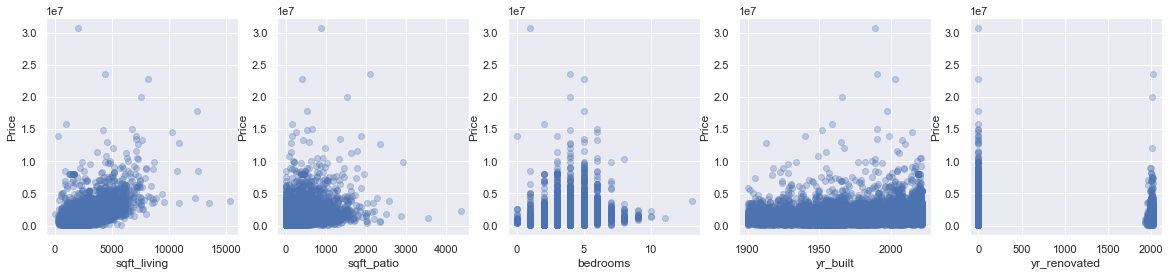

In [43]:
#'sqft_living', 'sqft_patio', 'bedrooms', 'yr_built', 'yr_renovated'
import matplotlib.pyplot as plt

columns = ['sqft_living', 'sqft_patio', 'bedrooms', 'yr_built', 'yr_renovated']

# Create a figure with 5 subplots
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# Plot each scatterplot in a separate subplot
for i, col in enumerate(columns):
    axs[i].scatter(re[col], re['price'], alpha=0.3)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price')

# Show the plot
plt.show()

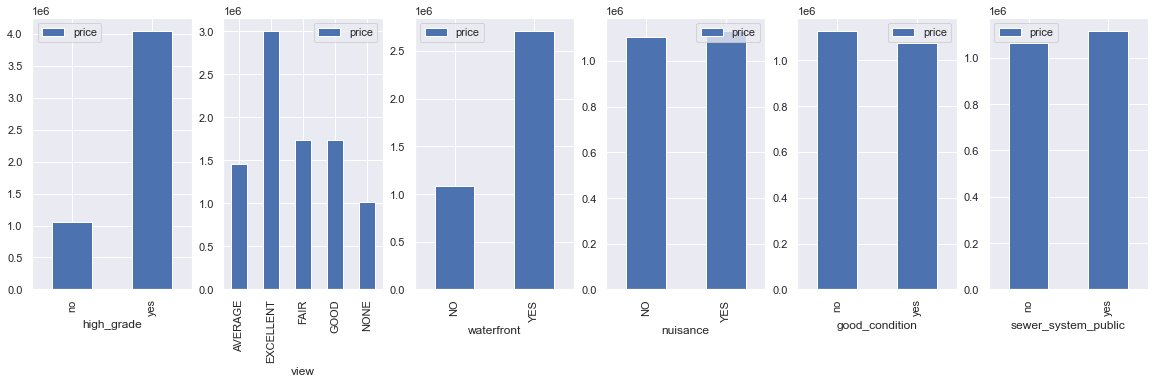

In [44]:
#everything except zipcode, as there are too many
pd.options.mode.chained_assignment = None

final_categorical_re = re.loc[:, ['high_grade', 'view', 'waterfront', 'nuisance',
                                  'good_condition','sewer_system_public']]
final_categorical_features = np.array(final_categorical_re.columns)
fig, axes = plt.subplots(ncols=len(final_categorical_features), figsize=(20,5))

for index, feature in enumerate(final_categorical_features):
    re.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

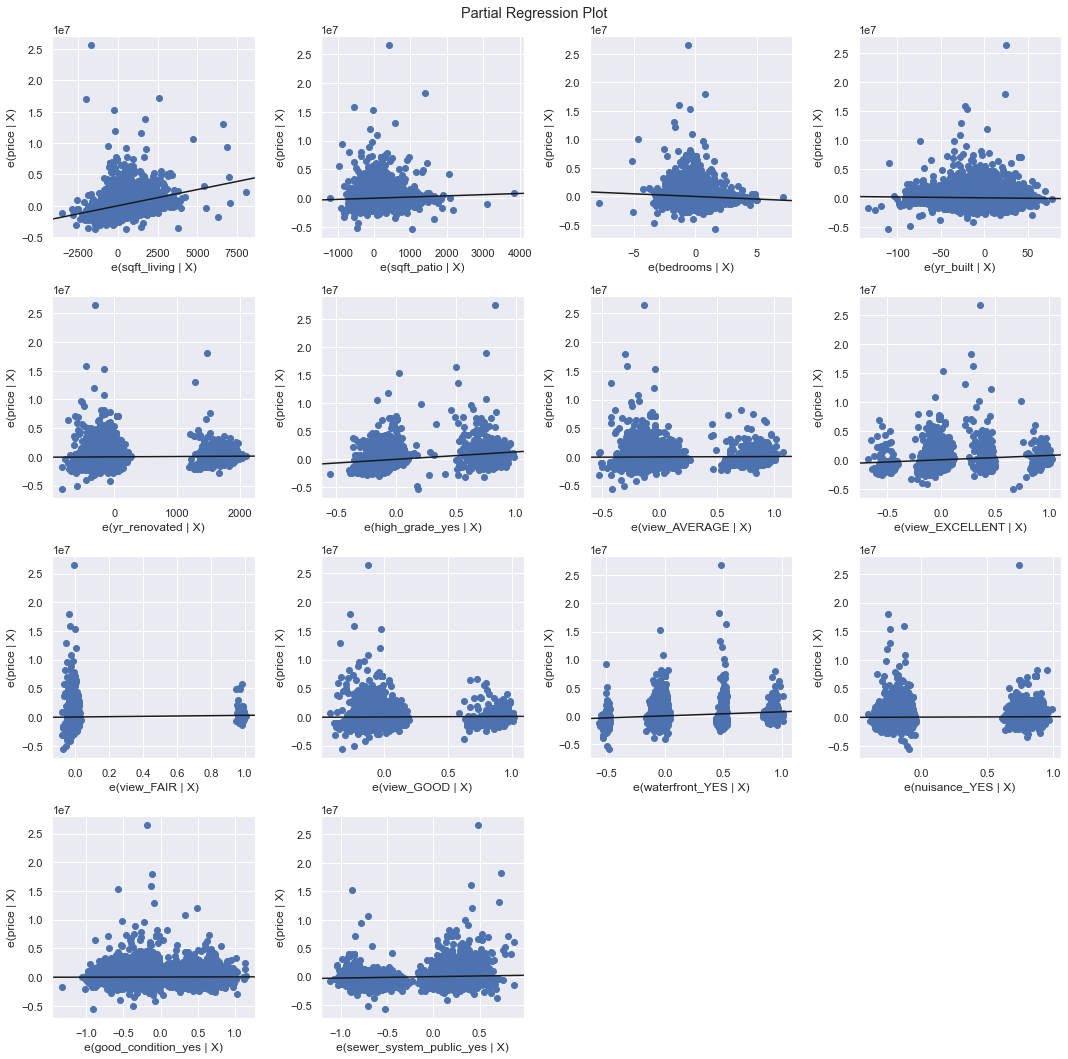

In [49]:
#everything except zipcode as there are too many

fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    iterated_results5,
    exog_idx=list(iterated_X5.columns),
    grid=(4,4),
    fig=fig)
plt.tight_layout()
plt.show()

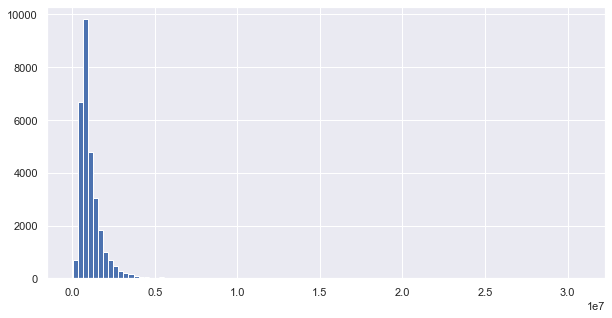

In [51]:
y.hist(bins=100, figsize=(10,5));

In [52]:
#reducing order of magnitude. logs undo exponentiation

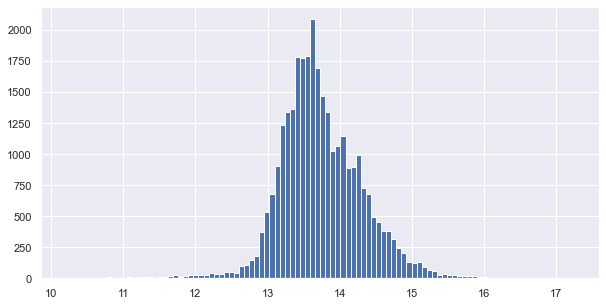

In [53]:
y_log = np.log(y)
y_log.hist(bins=100, figsize=(10,5));

In [54]:
log_model1 = sm.OLS(y_log, sm.add_constant(iterated_X5))
log_results1 = log_model1.fit()
print(log_results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     157.2
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:20:37   Log-Likelihood:                -9009.8
No. Observations:               30111   AIC:                         1.885e+04
Df Residuals:                   29698   BIC:                         2.228e+04
Df Model:                         412                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

For each increase of 1 unit in `sqft_living`, we see an associated change of .03% in house price.

In [ ]:
numeric_df = re.select_dtypes(include='number')

In [ ]:
re_preds = numeric_df.drop('price', axis=1)
re_preds.head()

In [ ]:
ss =  StandardScaler()
ss.fit(re_preds)
re_preds_st_scaled = ss.transform(re_preds)
re_preds_st_scaled[:5, :]

In [ ]:
lr = LinearRegression ()
lr.fit(re_preds_st_scaled, y)
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.score(re_preds_st_scaled, y)#fix this tmrw as it doesnt match the above .510

In [ ]:
y_hat = lr.predict(re_preds_st_scaled)
y_hat

In [71]:
X = re[['sqft_living', 'sqft_patio', 'yr_built', 'excellent_view', 'nuisance']]
X = pd.get_dummies(X, columns=['eview', 'nuisance'], drop_first=True)

In [73]:
model6 = sm.OLS(y_log, sm.add_constant(X))
results6 = model6.fit()
print(results6.rsquared_adj)
print(results6.pvalues)

0.4102599046611679
const             0.000000e+00
sqft_living       0.000000e+00
sqft_patio        9.787143e-30
yr_built          9.698302e-22
view_EXCELLENT    3.833104e-50
view_FAIR         1.144592e-04
view_GOOD         2.700286e-01
view_NONE         4.155345e-31
nuisance_YES      9.735873e-06
dtype: float64


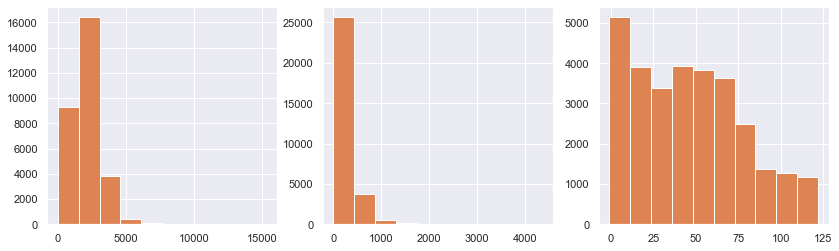

In [158]:
variables = [re.sqft_living, re.sqft_patio, re.age]

plt.figure(figsize=(14,4))
i = 0
for x in variables:
    i = i+1
    plt.subplot(1,3,i)
    plt.hist(x,histtype='bar')
    x.hist();

In [159]:
log_sqft_living = np.log(re.sqft_living)
log_sqft_patio = np.log(re.sqft_patio)
log_yr_built = np.log(re.age)

/Users/joshuaedelstein/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuaedelstein/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
re.grade.value_counts()

In [ ]:
criteria = {'1 Cabin': 'low', '2 Substandard': 'low', '3 Poor': 'low', '4 Low': 'low', 
            '5 Fair': 'fair', '6 Low Average': 'fair', '7 Average': 'fair', '8 Good': 'fair', 
            '9 Better': 'good', '10 Very Good': 'good', '11 Excellent': 'good', 
            '12 Luxury': 'good', '13 Mansion': 'good'}
re['grade_groups'] = re['grade'].map(criteria)

In [ ]:
X = re[['sqft_living', 'sqft_patio', 'yr_built', 'view', 'grade_groups']]
X = pd.get_dummies(X, columns=['view', 'grade_groups'], drop_first=True)

In [ ]:
model7 = sm.OLS(y, sm.add_constant(X))
results7 = model7.fit()
print(results7.rsquared_adj)
print(results7.pvalues)

this was not helpful

In [ ]:
y.hist(bins=50);

In [ ]:
log_y = np.log(y)

In [ ]:
log_y.hist(bins=50);

In [ ]:
X = re[['sqft_living', 'sqft_patio', 'yr_built', 'view', 'nuisance']]
X = pd.get_dummies(X, columns=['view', 'nuisance'], drop_first=True)

In [ ]:
model8 = sm.OLS(log_y, sm.add_constant(X))
results8 = model8.fit()
print(results8.summary())

r went down a bit, and a value is no longer stat significant. If u replace view with waterfront then all values are signif but r goes down to .401